Randomization Test (Permutation Test) for Genre vs Rating


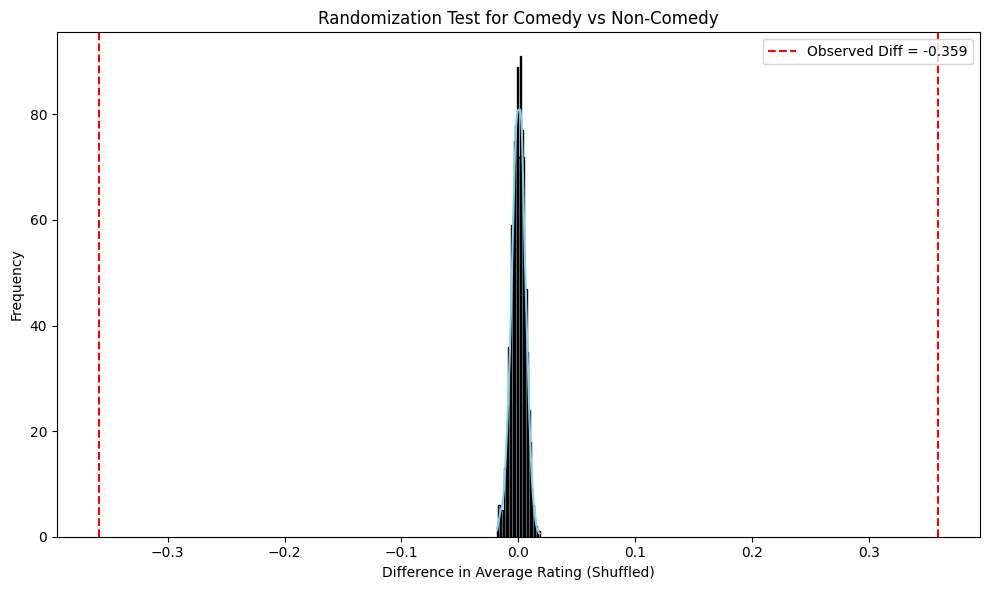

Observed Difference in Means: -0.3587
Permutation Test p-value: < 0.0010
Reject the null hypothesis: There is a significant difference.


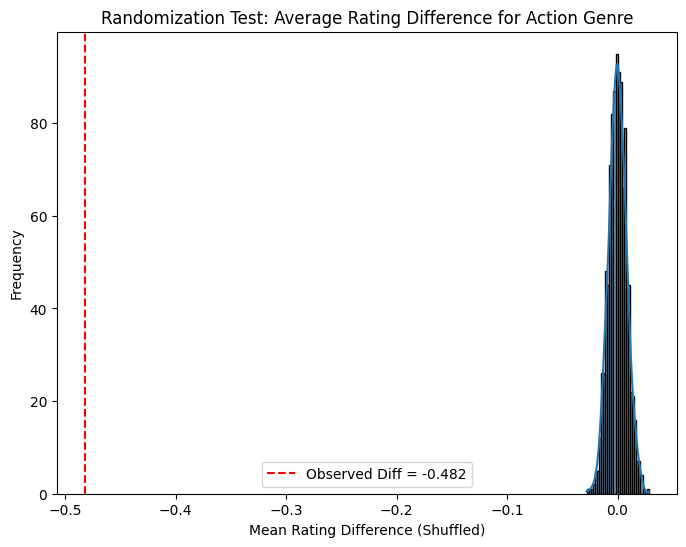

Permutation test p-value for Action genre: 0.0000
Reject the null hypothesis: There is a significant difference in the average ratings for Action genre.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from your Google Drive
df_basics = pd.read_csv('/content/drive/MyDrive/title.basics.tsv.gz', sep='\t', dtype=str, compression='gzip')
df_ratings = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv.gz', sep='\t', dtype=str, compression='gzip')

# Filter and clean
df_basics = df_basics[(df_basics['titleType'] == 'movie') & (df_basics['isAdult'] == '0')]
df = pd.merge(df_basics[['tconst', 'primaryTitle', 'genres']], df_ratings[['tconst', 'averageRating']], on='tconst')

# Convert ratings to numeric
df['averageRating'] = pd.to_numeric(df['averageRating'], errors='coerce')
df = df.dropna(subset=['averageRating'])

# Step 1: Select one genre to test (you can change 'Comedy' to any other genre)
target_genre = 'Comedy'

# Create a binary column for the target genre
df[target_genre] = df['genres'].str.contains(target_genre, case=False, na=False).astype(int)

# Step 2: Observed difference in means
group1 = df[df[target_genre] == 1]['averageRating']
group2 = df[df[target_genre] == 0]['averageRating']
observed_diff = group1.mean() - group2.mean()

# Step 3: Randomization test (permutation test)
n_permutations = 1000
diffs = []

for _ in range(n_permutations):
    shuffled = df[target_genre].sample(frac=1, replace=False).reset_index(drop=True)
    diff = df[shuffled == 1]['averageRating'].mean() - df[shuffled == 0]['averageRating'].mean()
    diffs.append(diff)

# Step 4: Calculate p-value
p_val = np.mean(np.abs(diffs) >= np.abs(observed_diff))
if p_val == 0:
    p_val_str = f"< {1/n_permutations:.4f}"
else:
    p_val_str = f"{p_val:.4f}"

# Step 5: Null hypothesis decision based on p-value
alpha = 0.05  # Significance level
if p_val < alpha:
    hypothesis_result = "Reject the null hypothesis: There is a significant difference."
else:
    hypothesis_result = "Fail to reject the null hypothesis: No significant difference."

# Step 6: Plotting the histogram of shuffled differences
plt.figure(figsize=(10,6))
sns.histplot(diffs, kde=True, color='skyblue', bins=30)
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff = {observed_diff:.3f}')
plt.axvline(-observed_diff, color='red', linestyle='--')
plt.title(f'Randomization Test for {target_genre} vs Non-{target_genre}')
plt.xlabel('Difference in Average Rating (Shuffled)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Display result
print(f"Observed Difference in Means: {observed_diff:.4f}")
print(f"Permutation Test p-value: {p_val_str}")
print(hypothesis_result)

# Second example: Action genre comparison
# Create a column for the 'Action' genre
df['Action'] = df['genres'].str.contains('Action', case=False, na=False).astype(int)

# Observed difference for 'Action' genre
observed_diff_action = df[df['Action'] == 1]['averageRating'].mean() - df[df['Action'] == 0]['averageRating'].mean()

# Permutation test for 'Action' genre
diffs_action = []
for _ in range(n_permutations):
    shuffled = np.random.permutation(df['Action'])
    diff = df[shuffled == 1]['averageRating'].mean() - df[shuffled == 0]['averageRating'].mean()
    diffs_action.append(diff)

# Plotting the histogram of shuffled differences for 'Action'
plt.figure(figsize=(8, 6))
sns.histplot(diffs_action, bins=30, kde=True)
plt.axvline(observed_diff_action, color='red', linestyle='--', label=f'Observed Diff = {observed_diff_action:.3f}')
plt.title('Randomization Test: Average Rating Difference for Action Genre')
plt.xlabel('Mean Rating Difference (Shuffled)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate p-value for 'Action'
p_val_action = np.mean(np.abs(diffs_action) >= np.abs(observed_diff_action))
print(f"Permutation test p-value for Action genre: {p_val_action:.4f}")

# Hypothesis testing decision for 'Action' genre
if p_val_action < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average ratings for Action genre.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the average ratings for Action genre.")
